In [177]:
# import the required software libraries
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [178]:
# https://gml.noaa.gov/ccgg/trends/data.html
mauna_loa = pd.read_csv('https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv', skiprows=43)

In [179]:
cols = ['year', 'co2_ppm', 'unc']

In [180]:
# https://sparkbyexamples.com/pandas/rename-columns-with-list-in-pandas-dataframe/
mauna_loa.columns = cols

In [181]:
mauna_loa['years_before_present'] = 2023 - mauna_loa['year']

In [182]:
mauna_loa

,year,co2_ppm,unc,years_before_present
0,1959,315.98,0.12,64
1,1960,316.91,0.12,63
2,1961,317.64,0.12,62
3,1962,318.45,0.12,61
4,1963,318.99,0.12,60
...,...,...,...,...
59,2018,408.72,0.12,5
60,2019,411.65,0.12,4
61,2020,414.21,0.12,3
62,2021,416.41,0.12,2


In [183]:
# data = pd.read_excel('https://static-content.springer.com/esm/art%3A10.1038%2Fnature06949/MediaObjects/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='all records')

In [228]:
master_data = pd.read_excel('grl52461-sup-0003-supplementary.xls', sheet_name='all records')

In [241]:
rubino = master_data.iloc[6:, [83, 86]]

In [242]:
rubino.rename(columns=({'Unnamed: 83':'yr_bp', 'Unnamed: 86':'co2_ppmv'}), inplace=True)

In [237]:
def year(sample):
    sample['year'] = 1950-(sample['yr_bp'])
    sample['years_before_present'] = 2023 - sample['year']
    sample.dropna(axis=0, inplace=True)
    return sample

In [244]:
year(rubino)

,yr_bp,co2_ppmv,year,years_before_present
6,-51.03,368.022488,2001.03,21.97
8,-48,361.780737,1998,25
9,-46.279272,359.647793,1996.279272,26.720728
12,-44.405642,357.10674,1994.405642,28.594358
16,-43.08,353.946685,1993.08,29.92
...,...,...,...,...
333,1675.55608,280.244492,274.44392,1748.55608
334,1683.90469,278.3144,266.09531,1756.90469
335,1709.3986,280.249087,240.6014,1782.3986
336,1775.46638,277.555892,174.53362,1848.46638


In [245]:
rubino = rubino.iloc[48:, :]

In [246]:
rubino

,yr_bp,co2_ppmv,year,years_before_present
90,-8.562971,316.33402,1958.562971,64.437029
91,-8.102786,316.101403,1958.102786,64.897214
92,-7.872424,314.572166,1957.872424,65.127576
93,-7.257539,315.270355,1957.257539,65.742461
94,-7.203374,316.32538,1957.203374,65.796626
...,...,...,...,...
333,1675.55608,280.244492,274.44392,1748.55608
334,1683.90469,278.3144,266.09531,1756.90469
335,1709.3986,280.249087,240.6014,1782.3986
336,1775.46638,277.555892,174.53362,1848.46638


In [247]:
macfarling = master_data.iloc[6:, 68:70]

In [248]:
macfarling.rename(columns=({'Law Dome (0-2 kyr BP)':'yr_bp', 'Unnamed: 69':'co2_ppmv'}), inplace=True)

In [249]:
year(macfarling)

,yr_bp,co2_ppmv,year,years_before_present
6,-46.5,359.5,1996.5,26.5
7,-44.5,356.9,1994.5,28.5
8,-42.4,353.6,1992.4,30.6
9,-39.8,349.7,1989.8,33.2
10,-33.7,341.2,1983.7,39.3
...,...,...,...,...
137,1814,278.1,136,1887
138,1846,277.5,104,1919
139,1894,277.4,56,1967
140,1920,277.9,30,1993


In [250]:
macfarling.drop(range(6,137), inplace=True)

In [271]:
monnin = master_data.iloc[6:, 2:4]

In [272]:
monnin.rename(columns=({'Unnamed: 2':'yr_bp', 'Unnamed: 3':'co2_ppmv'}), inplace=True)

In [273]:
year(monnin)

,yr_bp,co2_ppmv,year,years_before_present
6,350.110103,280.4,1599.889897,423.110103
7,486.6932,274.9,1463.3068,559.6932
8,501.195,277.9,1448.805,574.195
9,539.649455,279.1,1410.350545,612.649455
10,539.894909,281.9,1410.105091,612.894909
...,...,...,...,...
184,21718.170909,186.5,-19768.170909,21791.170909
185,21823.70303,184.7,-19873.70303,21896.70303
186,21936.790909,186.1,-19986.790909,22009.790909
187,22133.247273,185.7,-20183.247273,22206.247273


In [274]:
monnin.drop(range(6,25), inplace=True)

In [275]:
monnin.drop(range(120,189), inplace=True)

In [276]:
monnin

,yr_bp,co2_ppmv,year,years_before_present
25,1999.709091,278,-49.709091,2072.709091
26,2093.359091,276.9,-143.359091,2166.359091
27,2234.235273,276.7,-284.235273,2307.235273
28,2265.549333,276.7,-315.549333,2338.549333
29,2414.316667,277.6,-464.316667,2487.316667
...,...,...,...,...
115,11161.063636,264.8,-9211.063636,11234.063636
116,11185.870909,265,-9235.870909,11258.870909
117,11200.576364,265.3,-9250.576364,11273.576364
118,11256.567879,264.4,-9306.567879,11329.567879


In [281]:
marcott = master_data.iloc[6:, 98:100]

In [282]:
marcott

,Unnamed: 98,Unnamed: 99
6,8893.213,267.902828
7,8985.488,265.447325
8,9080.986,268.861214
9,9176.945,263.952432
10,9274.864,270.597511
...,...,...
393,NaN,NaN
394,NaN,NaN
395,NaN,NaN
396,NaN,NaN


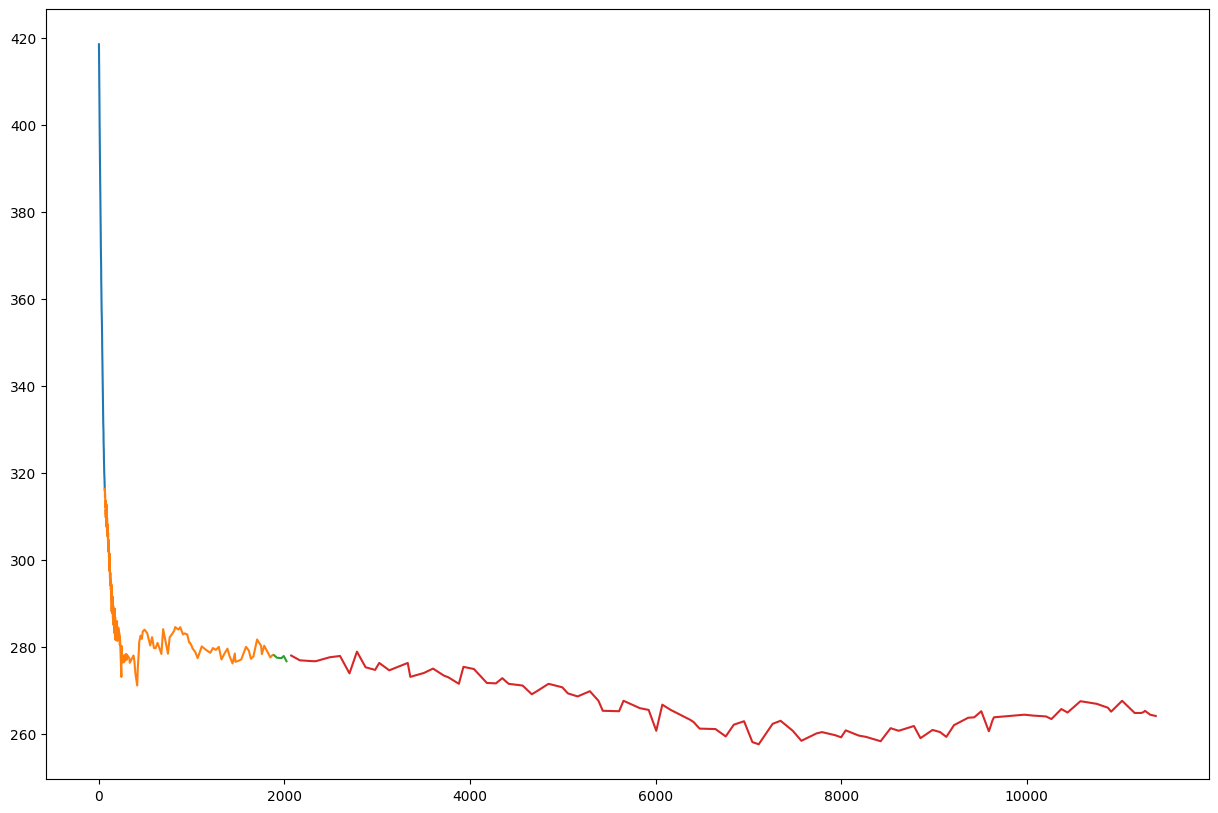

In [277]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(mauna_loa['years_before_present'], mauna_loa['co2_ppm'])
ax.plot(rubino['years_before_present'], rubino['co2_ppmv'])
ax.plot(macfarling['years_before_present'], macfarling['co2_ppmv'])
ax.plot(monnin['years_before_present'], monnin['co2_ppmv'])
